In [1]:
import talib
import pandas as pd 
import numpy as np
from talib import abstract
from talib.abstract import *

In [34]:
def is_consolidating(df, percentage=2.5):

    """
    args: 
        df = dataframe (stock data of last 15 candlesticks), 
        percentage = percentage of consolidation

    returns: 0 if not consolidating, 1 if consolidating

    summary: 
        This is a Python function that checks if a stock is consolidating by analyzing the previous 15 candlesticks of stock data in a pandas DataFrame (df). 
        The function takes a percentage value for percentage, which determines the minimum difference allowed between the maximum and minimum closing prices for
        the stock to be considered consolidating.

        If the difference between the maximum and minimum closing prices is less than or equal to the threshold calculated from the percentage value, 
        the function returns True, indicating that the stock is consolidating. Otherwise, it returns False, indicating that the stock is not consolidating. 
        The function returns values consistent with the docstring,
        which says that it returns 0 if not consolidating and 1 if consolidating.

    """

    recent_candlesticks = df[-15:]
    
    max_close = recent_candlesticks['Close'].max()
    min_close = recent_candlesticks['Close'].min()

    threshold = 1 - (percentage / 100)
    if min_close > (max_close * threshold):
        return True        

    return False




def is_breaking_out(df, percentage=2.5):

    '''
    args:
    df = dataframe (last 15 days of data)
    percentage = percentage of consolidation



    returns: 0 if not breaking out, 1 if breaking out

    summary: 
        This is a Python function that checks whether a stock is breaking out by analyzing the previous 15 days of stock data in a pandas DataFrame. 
        The function first checks if the stock is consolidating using another function, and if it is,
        it checks if the most recent closing price is higher than the highest closing price in the previous 15 days.
        If it is, the function returns True, otherwise it returns False.



    '''
    last_close = df[-1:]['Close'].values[0]

    if is_consolidating(df[:-1], percentage=percentage):
        recent_closes = df[-16:-1]

        if last_close > recent_closes['Close'].max():
            return True

    return False





read_stock_data = pd.read_csv(
    r'C:\Users\Amzad\Desktop\stock_prediction\components\Stock Price Dataset - SQURPHARMA.csv')


def chk_breakout_consolidate(read_stock_data=read_stock_data):
    '''
    args: read_stock_data = dataframe of stock(single company data) 
    returns: 
    breakout_indicator,consolidate_indicator date
    summary: 
        This is a Python function that analyzes a DataFrame of stock data for a single company (read_stock_data) and determines if the stock is consolidating or
        breaking out for each day in the data set. The function uses the is_consolidating() and is_breaking_out() functions previously defined to make this determination.
        For each day in the data set, the function takes the previous 16 days of data and checks if the stock is consolidating or breaking out.
        If the stock is consolidating, the function appends a value of 1 to the consolidate_indicator list, otherwise it appends 0. 
        If the stock is breaking out, the function appends a value of 1 to the breakout_indicator list, otherwise it appends 0.
        The function also creates a list of dates for each day analyzed in the date list. The function returns the breakout_indicator, consolidate_indicator, and date lists.

    '''
    # Initialize empty lists for the breakout indicator, consolidate indicator, and date
    breakout_indicator = []
    consolidate_indicator = []
    #add 16 days of 0 to the list
    date = []
    
    # Start iterating from the 16th row of the DataFrame
    date_srt = 16
    for i in range(16, read_stock_data.shape[0]):
        # Take the previous 16 rows of data
        df = read_stock_data[i-16:i] # 16 days data (rows 0 to 15)
        
        # Determine if the stock is consolidating or not
        if is_consolidating(df):
            consolidate_indicator.append(1)
        else: 
            consolidate_indicator.append(0)
            
        # Determine if the stock is breaking out or not
        if is_breaking_out(df,percentage=0.5):
            breakout_indicator.append(1)
        else: 
            breakout_indicator.append(0) 
        
      
        date.append(read_stock_data.iloc[i]['Date'])

    # Return the breakout indicator, consolidate indicator, and date lists
    return breakout_indicator, consolidate_indicator, date


breakout_indicator, consolidate_indicator, date = chk_breakout_consolidate(read_stock_data=read_stock_data)


In [10]:
print(len(breakout_indicator), len(consolidate_indicator), len(date))

5789 5789 5789


In [4]:
count = [3.5,3.0,2.5,2.0,1.5,1.0,0.5]
persentage = [319, 244, 169, 103, 49, 13, 5] 

In [35]:


#count all the 1's in the breakout_indicator list 
breakout_count = 0
for i in breakout_indicator:
    if i == 1:
        breakout_count += 1

persentage.append(breakout_count)


In [36]:
print(persentage)

[319, 244, 169, 103, 49, 13, 5]


<BarContainer object of 7 artists>

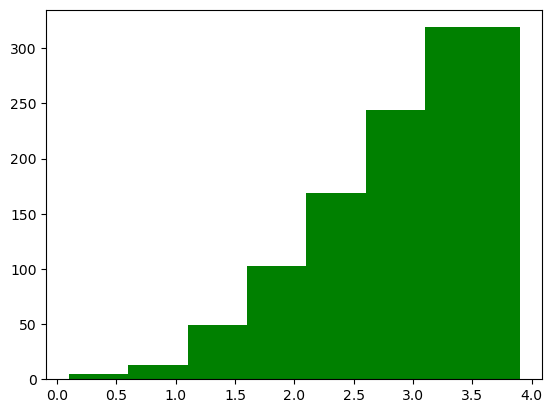

In [9]:
from matplotlib import pyplot as plt 
plt.bar(count, persentage , color='green')

In [ ]:
Date= date
df = pd.DataFrame({'Date':Date,'Breakout':breakout_indicator,'Consolidate':consolidate_indicator})
#save it to csv file
df.to_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\Feature Engineering\Breakout_Consolidate.csv',index=False)

In [14]:
Stock_Squre_data = pd.read_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\notebook\data\Stock Price Dataset - SQURPHARMA.csv')
# take 1st 5 columns 
Stock_Squre_data = Stock_Squre_data.iloc[:,0:5]

In [16]:
out_SMA=[]
out_EMA=[] 
out_BBANDS_UPPER=[] 
out_BBANDS_MIDDLE=[]
out_BBANDS_LOWER=[]
out_STOCH_SLOWK=[]
out_STOCH_SLOWD=[]

for i in range(100,5805,100):

     
     
    inputs = {
          'open': Stock_Squre_data['Open'].iloc[i-100:i],               
          'high': Stock_Squre_data['High'].iloc[i-100:i],
          'low': Stock_Squre_data['Low'].iloc[i-100:i],
          'close': Stock_Squre_data['Close'].iloc[i-100:i],
          'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
               }
    out_SMA.append(SMA(inputs,timeperiod=15))
    upper, middle, lower = BBANDS(inputs, 20, 2.0, 2.0)
    out_BBANDS_UPPER.append(upper)
    out_BBANDS_MIDDLE.append(middle)
    out_BBANDS_LOWER.append(lower)
    slowk, slowd = STOCH(inputs, 5, 3, 0, 3, 0, prices=['high', 'low', 'open'])
    out_STOCH_SLOWK.append(slowk)
    out_STOCH_SLOWD.append(slowd)

    #FOR LAST 5 DAYS 
    if i == 5800:
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        out_SMA.append(SMA(inputs,timeperiod=5,))
        upper, middle, lower = BBANDS(inputs, 20, 2.0, 2.0)
        out_BBANDS_UPPER.append(upper)
        out_BBANDS_MIDDLE.append(middle)    
        out_BBANDS_LOWER.append(lower)
        slowk, slowd = STOCH(inputs, 5, 3, 0, 3, 0, prices=['high', 'low', 'open'])
        out_STOCH_SLOWK.append(slowk)
        out_STOCH_SLOWD.append(slowd)

    


In [17]:
out_SMA_col=[]
out_BBANDS_UPPER_col=[] 
out_BBANDS_MIDDLE_col=[]
out_BBANDS_LOWER_col=[]
out_STOCH_SLOWK_col=[]
out_STOCH_SLOWD_col=[]




for i in range(0,59):
    for j in range(0,100):
        try:
            out_SMA_col.append(out_SMA[i][j])
            out_BBANDS_UPPER_col.append(out_BBANDS_UPPER[i][j])
            out_BBANDS_MIDDLE_col.append(out_BBANDS_MIDDLE[i][j])
            out_BBANDS_LOWER_col.append(out_BBANDS_LOWER[i][j])
            out_STOCH_SLOWK_col.append(out_STOCH_SLOWK[i][j])
            out_STOCH_SLOWD_col.append(out_STOCH_SLOWD[i][j])
        except:
            pass 

        
         

In [18]:
#make dataframe 
df = pd.DataFrame({'SMA':out_SMA_col,'BBANDS_UPPER':out_BBANDS_UPPER_col,'BBANDS_MIDDLE':out_BBANDS_MIDDLE_col,'BBANDS_LOWER':out_BBANDS_LOWER_col,'STOCH_SLOWK':out_STOCH_SLOWK_col,'STOCH_SLOWD':out_STOCH_SLOWD_col})
df.shape

(5805, 6)

In [27]:
out_CDLTAKURI=[]
out_CDLTASUKIGAP=[]
out_CDLTHRUSTING=[]
out_CDLTRISTAR=[]
out_CDLUNIQUE3RIVER=[]
out_CDLUPSIDEGAP2CROWS=[]
out_CDLXSIDEGAP3METHODS=[]
out_CDLSHORTLINE=[]


for i in range(100,5805,100):
    inputs = {
          'open': Stock_Squre_data['Open'].iloc[i-100:i],               
          'high': Stock_Squre_data['High'].iloc[i-100:i],
          'low': Stock_Squre_data['Low'].iloc[i-100:i],
          'close': Stock_Squre_data['Close'].iloc[i-100:i],
          'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
               }
    out_CDLTAKURI.append(CDLTAKURI(inputs,timeperiod=15))
    out_CDLTASUKIGAP.append(CDLTASUKIGAP(inputs,timeperiod=15))
    out_CDLTHRUSTING.append(CDLTHRUSTING(inputs,timeperiod=15))
    out_CDLTRISTAR.append(CDLTRISTAR(inputs,timeperiod=15))
    out_CDLUNIQUE3RIVER.append(CDLUNIQUE3RIVER(inputs,timeperiod=15))
    out_CDLUPSIDEGAP2CROWS.append(CDLUPSIDEGAP2CROWS(inputs,timeperiod=15))
    out_CDLXSIDEGAP3METHODS.append(CDLXSIDEGAP3METHODS(inputs,timeperiod=15))
    out_CDLSHORTLINE.append(CDLSHORTLINE(inputs,timeperiod=15))
    
    #FOR LAST 5 DAYS 
    if i == 5800:
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        out_CDLTAKURI.append(CDLTAKURI(inputs,timeperiod=5))
        out_CDLTASUKIGAP.append(CDLTASUKIGAP(inputs,timeperiod=5))
        out_CDLTHRUSTING.append(CDLTHRUSTING(inputs,timeperiod=5))
        out_CDLTRISTAR.append(CDLTRISTAR(inputs,timeperiod=5))
        out_CDLUNIQUE3RIVER.append(CDLUNIQUE3RIVER(inputs,timeperiod=5))
        out_CDLUPSIDEGAP2CROWS.append(CDLUPSIDEGAP2CROWS(inputs,timeperiod=5))
        out_CDLXSIDEGAP3METHODS.append(CDLXSIDEGAP3METHODS(inputs,  timeperiod=5))
        out_CDLSHORTLINE.append(CDLSHORTLINE(inputs,timeperiod=5))





In [28]:
out_CDLTAKURI_col=[]
out_CDLTASUKIGAP_col=[]
out_CDLTHRUSTING_col=[]
out_CDLTRISTAR_col=[]
out_CDLUNIQUE3RIVER_col=[]
out_CDLUPSIDEGAP2CROWS_col=[]
out_CDLXSIDEGAP3METHODS_col=[]
out_CDLSHORTLINE_col=[]

for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLTAKURI_col.append(out_CDLTAKURI[i][j])
            out_CDLTASUKIGAP_col.append(out_CDLTASUKIGAP[i][j])
            out_CDLTHRUSTING_col.append(out_CDLTHRUSTING[i][j])
            out_CDLTRISTAR_col.append(out_CDLTRISTAR[i][j])
            out_CDLUNIQUE3RIVER_col.append(out_CDLUNIQUE3RIVER[i][j])
            out_CDLUPSIDEGAP2CROWS_col.append(out_CDLUPSIDEGAP2CROWS[i][j])
            out_CDLXSIDEGAP3METHODS_col.append(out_CDLXSIDEGAP3METHODS[i][j])
            out_CDLSHORTLINE_col.append(out_CDLSHORTLINE[i][j])
        except:
            pass


In [29]:
#make dataframe 
df = pd.DataFrame({"CDLTAKURI" : out_CDLTAKURI_col,"CDLTASUKIGAP" : out_CDLTASUKIGAP_col, "CDLTHRUSTING" : out_CDLTHRUSTING_col,"CDLTRISTAR" : out_CDLTRISTAR_col,"CDLUNIQUE3RIVER" : out_CDLUNIQUE3RIVER_col,"CDLUPSIDEGAP2CROWS" : out_CDLUPSIDEGAP2CROWS_col,"CDLXSIDEGAP3METHODS" : out_CDLXSIDEGAP3METHODS_col,"CDLSHORTLINE" : out_CDLSHORTLINE_col })
print(df.shape)


(5805, 8)


In [30]:
out_CDLMATHOLD=[]
out_CDLMORNINGDOJISTAR=[]
out_CDLMORNINGSTAR=[] 
out_CDLONNECK=[]
out_CDLPIERCING=[]
out_CDLRICKSHAWMAN=[]
out_CDLRISEFALL3METHODS=[]
out_CDLSEPARATINGLINES=[]
out_CDLSPINNINGTOP=[]
out_CDLSTALLEDPATTERN=[]
out_CDLSTICKSANDWICH=[]

for i in range(100,5805,100):
    inputs = {
          'open': Stock_Squre_data['Open'].iloc[i-100:i],               
          'high': Stock_Squre_data['High'].iloc[i-100:i],
          'low': Stock_Squre_data['Low'].iloc[i-100:i],
          'close': Stock_Squre_data['Close'].iloc[i-100:i],
          'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
               }
    out_CDLMATHOLD.append(CDLMATHOLD(inputs,timeperiod=15))
    out_CDLMORNINGDOJISTAR.append(CDLMORNINGDOJISTAR(inputs, timeperiod=15))
    out_CDLMORNINGSTAR.append(CDLMORNINGSTAR(inputs, timeperiod=15))
    out_CDLONNECK.append(CDLONNECK(inputs, penetration=15))
    out_CDLPIERCING.append(CDLPIERCING(inputs, penetration=15))
    out_CDLRICKSHAWMAN.append(CDLRICKSHAWMAN(inputs, penetration=15))
    out_CDLRISEFALL3METHODS.append(CDLRISEFALL3METHODS(inputs, penetration=15))
    out_CDLSEPARATINGLINES.append(CDLSEPARATINGLINES(inputs, penetration=15))
    out_CDLSPINNINGTOP.append(CDLSPINNINGTOP(inputs, penetration=15))
    out_CDLSTALLEDPATTERN.append(CDLSTALLEDPATTERN(inputs, penetration=15))
    out_CDLSTICKSANDWICH.append(CDLSTICKSANDWICH(inputs, penetration=15))
    
    #FOR LAST 5 DAYS 
    if i == 5800:
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        out_CDLMATHOLD.append(CDLMATHOLD(inputs,timeperiod=5))
        out_CDLMORNINGDOJISTAR.append(CDLMORNINGDOJISTAR(inputs, timeperiod=5))
        out_CDLMORNINGSTAR.append(CDLMORNINGSTAR(inputs, timeperiod=5))
        out_CDLONNECK.append(CDLONNECK(inputs, penetration=5))
        out_CDLPIERCING.append(CDLPIERCING(inputs, penetration=5))
        out_CDLRICKSHAWMAN.append(CDLRICKSHAWMAN(inputs, penetration=5))
        out_CDLRISEFALL3METHODS.append(CDLRISEFALL3METHODS(inputs, penetration=5))
        out_CDLSEPARATINGLINES.append(CDLSEPARATINGLINES(inputs, penetration=5))
        out_CDLSPINNINGTOP.append(CDLSPINNINGTOP(inputs, penetration=5))
        out_CDLSTALLEDPATTERN.append(CDLSTALLEDPATTERN(inputs, penetration=5))
        out_CDLSTICKSANDWICH.append(CDLSTICKSANDWICH(inputs, penetration=5))


        
  


In [31]:
out_CDLMATHOLD_col=[]
out_CDLMORNINGDOJISTAR_col=[]
out_CDLMORNINGSTAR_col=[] 
out_CDLONNECK_col=[]
out_CDLPIERCING_col=[]
out_CDLRICKSHAWMAN_col=[]
out_CDLRISEFALL3METHODS_col=[]
out_CDLSEPARATINGLINES_col=[]
out_CDLSPINNINGTOP_col=[]
out_CDLSTALLEDPATTERN_col=[]
out_CDLSTICKSANDWICH_col=[]



for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLMATHOLD_col.append(out_CDLMATHOLD[i][j])
            out_CDLMORNINGDOJISTAR_col.append(out_CDLMORNINGDOJISTAR[i][j])
            out_CDLMORNINGSTAR_col.append(out_CDLMORNINGSTAR[i][j])
            out_CDLONNECK_col.append(out_CDLONNECK[i][j])
            out_CDLPIERCING_col.append(out_CDLPIERCING[i][j])
            out_CDLRICKSHAWMAN_col.append(out_CDLRICKSHAWMAN[i][j])
            out_CDLRISEFALL3METHODS_col.append(out_CDLRISEFALL3METHODS[i][j])
            out_CDLSEPARATINGLINES_col.append(out_CDLSEPARATINGLINES[i][j])
            out_CDLSPINNINGTOP_col.append(out_CDLSPINNINGTOP[i][j])
            out_CDLSTALLEDPATTERN_col.append(out_CDLSTALLEDPATTERN[i][j])
            out_CDLSTICKSANDWICH_col.append(out_CDLSTICKSANDWICH[i][j])
        except:
            pass


In [32]:
df = pd.DataFrame({'CDLMATHOLD':out_CDLMATHOLD_col, 'CDLMORNINGDOJISTAR':out_CDLMORNINGDOJISTAR_col, 'CDLMORNINGSTAR':out_CDLMORNINGSTAR_col, 'CDLONNECK':out_CDLONNECK_col, 'CDLPIERCING':out_CDLPIERCING_col, 'CDLRICKSHAWMAN':out_CDLRICKSHAWMAN_col, 'CDLRISEFALL3METHODS':out_CDLRISEFALL3METHODS_col, 'CDLSEPARATINGLINES':out_CDLSEPARATINGLINES_col, 'CDLSPINNINGTOP':out_CDLSPINNINGTOP_col, 'CDLSTALLEDPATTERN':out_CDLSTALLEDPATTERN_col, 'CDLSTICKSANDWICH':out_CDLSTICKSANDWICH_col})
df.shape

(5805, 11)

In [33]:
out_CDLHIKKAKEMOD=[]
out_CDLHOMINGPIGEON=[]
out_CDLIDENTICAL3CROWS=[]
out_CDLINNECK=[]
out_CDLINVERTEDHAMMER=[]
out_CDLKICKING=[]
out_CDLKICKINGBYLENGTH=[]
out_CDLLADDERBOTTOM=[]
out_CDLLONGLEGGEDDOJI=[]
out_CDLLONGLINE=[]
out_CDLMARUBOZU=[]
out_CDLMATCHINGLOW=[]

for i in range(100,5805,100):

    inputs = {
          'open': Stock_Squre_data['Open'].iloc[i-100:i],               
          'high': Stock_Squre_data['High'].iloc[i-100:i],
          'low': Stock_Squre_data['Low'].iloc[i-100:i],
          'close': Stock_Squre_data['Close'].iloc[i-100:i],
          'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
               }
    out_CDLHIKKAKEMOD.append(CDLHIKKAKEMOD(inputs,timeperiod=15))
    out_CDLHOMINGPIGEON.append(CDLHOMINGPIGEON(inputs, timeperiod=15))
    out_CDLIDENTICAL3CROWS.append(CDLIDENTICAL3CROWS(inputs, timeperiod=15))
    out_CDLINNECK.append(CDLINNECK(inputs, penetration=15))
    out_CDLINVERTEDHAMMER.append(CDLINVERTEDHAMMER(inputs, penetration=15))
    out_CDLKICKING.append(CDLKICKING(inputs, penetration=15))
    out_CDLKICKINGBYLENGTH.append(CDLKICKINGBYLENGTH(inputs, penetration=15))
    out_CDLLADDERBOTTOM.append(CDLLADDERBOTTOM(inputs, penetration=15))
    out_CDLLONGLEGGEDDOJI.append(CDLLONGLEGGEDDOJI(inputs, penetration=15))
    out_CDLLONGLINE.append(CDLLONGLINE(inputs, penetration=15))
    out_CDLMARUBOZU.append(CDLMARUBOZU(inputs, penetration=15))
    out_CDLMATCHINGLOW.append(CDLMATCHINGLOW(inputs, penetration=15))
    
    #FOR LAST 5 DAYS 
    if i == 5800:
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        out_CDLHIKKAKEMOD.append(CDLHIKKAKEMOD(inputs,timeperiod=5))
        out_CDLHOMINGPIGEON.append(CDLHOMINGPIGEON(inputs, timeperiod=5))
        out_CDLIDENTICAL3CROWS.append(CDLIDENTICAL3CROWS(inputs, timeperiod=5))
        out_CDLINNECK.append(CDLINNECK(inputs, penetration=5))
        out_CDLINVERTEDHAMMER.append(CDLINVERTEDHAMMER(inputs, penetration=5))
        out_CDLKICKING.append(CDLKICKING(inputs, penetration=5))
        out_CDLKICKINGBYLENGTH.append(CDLKICKINGBYLENGTH(inputs, penetration=5))
        out_CDLLADDERBOTTOM.append(CDLLADDERBOTTOM(inputs, penetration=5))
        out_CDLLONGLEGGEDDOJI.append(CDLLONGLEGGEDDOJI(inputs, penetration=5))
        out_CDLLONGLINE.append(CDLLONGLINE(inputs, penetration=5))
        out_CDLMARUBOZU.append(CDLMARUBOZU(inputs, penetration=5))
        out_CDLMATCHINGLOW.append(CDLMATCHINGLOW(inputs, penetration=5))

        

In [34]:
out_CDLHIKKAKEMOD_col=[]
out_CDLHOMINGPIGEON_col=[]
out_CDLIDENTICAL3CROWS_col=[]
out_CDLINNECK_col=[]
out_CDLINVERTEDHAMMER_col=[]
out_CDLKICKING_col=[]
out_CDLKICKINGBYLENGTH_col=[]
out_CDLLADDERBOTTOM_col=[]
out_CDLLONGLEGGEDDOJI_col=[]
out_CDLLONGLINE_col=[]
out_CDLMARUBOZU_col=[]
out_CDLMATCHINGLOW_col=[]



for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLHIKKAKEMOD_col.append(out_CDLHIKKAKEMOD[i][j])
            out_CDLHOMINGPIGEON_col.append(out_CDLHOMINGPIGEON[i][j])
            out_CDLIDENTICAL3CROWS_col.append(out_CDLIDENTICAL3CROWS[i][j])
            out_CDLINNECK_col.append(out_CDLINNECK[i][j])
            out_CDLINVERTEDHAMMER_col.append(out_CDLINVERTEDHAMMER[i][j])
            out_CDLKICKING_col.append(out_CDLKICKING[i][j])
            out_CDLKICKINGBYLENGTH_col.append(out_CDLKICKINGBYLENGTH[i][j])
            out_CDLLADDERBOTTOM_col.append(out_CDLLADDERBOTTOM[i][j])
            out_CDLLONGLEGGEDDOJI_col.append(out_CDLLONGLEGGEDDOJI[i][j])
            out_CDLLONGLINE_col.append(out_CDLLONGLINE[i][j])
            out_CDLMARUBOZU_col.append(out_CDLMARUBOZU[i][j])
            out_CDLMATCHINGLOW_col.append(out_CDLMATCHINGLOW[i][j])
        except:
            pass



In [35]:
#mask a dataframe 
df = pd.DataFrame({'CDLHIKKAKEMOD':out_CDLHIKKAKEMOD_col, 'CDLHOMINGPIGEON':out_CDLHOMINGPIGEON_col, 'CDLIDENTICAL3CROWS':out_CDLIDENTICAL3CROWS_col, 'CDLINNECK':out_CDLINNECK_col, 'CDLINVERTEDHAMMER':out_CDLINVERTEDHAMMER_col, 'CDLKICKING':out_CDLKICKING_col, 'CDLKICKINGBYLENGTH':out_CDLKICKINGBYLENGTH_col, 'CDLLADDERBOTTOM':out_CDLLADDERBOTTOM_col, 'CDLLONGLEGGEDDOJI':out_CDLLONGLEGGEDDOJI_col, 'CDLLONGLINE':out_CDLLONGLINE_col, 'CDLMARUBOZU':out_CDLMARUBOZU_col, 'CDLMATCHINGLOW':out_CDLMATCHINGLOW_col})
df.shape


(5805, 12)

In [36]:
out_CDLEVENINGDOJISTAR = []
out_CDLEVENINGSTAR = []
out_CDLGAPSIDESIDEWHITE = []
out_CDLGRAVESTONEDOJI = []
out_CDLHAMMER = []
out_CDLHANGINGMAN = []
out_CDLHARAMI=[]
out_CDLHARAMICROSS=[]
out_CDLHIGHWAVE=[]
out_CDLHIKKAKE=[]

for i in range(100,5805,100):
    
        inputs = {
            'open': Stock_Squre_data['Open'].iloc[i-100:i],               
            'high': Stock_Squre_data['High'].iloc[i-100:i],
            'low': Stock_Squre_data['Low'].iloc[i-100:i],
            'close': Stock_Squre_data['Close'].iloc[i-100:i],
            'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
                }
        out_CDLEVENINGDOJISTAR.append(CDLEVENINGDOJISTAR(inputs,timeperiod=15))
        out_CDLEVENINGSTAR.append(CDLEVENINGSTAR(inputs, timeperiod=15))
        out_CDLGAPSIDESIDEWHITE.append(CDLGAPSIDESIDEWHITE(inputs, timeperiod=15))
        out_CDLGRAVESTONEDOJI.append(CDLGRAVESTONEDOJI(inputs, penetration=15))
        out_CDLHAMMER.append(CDLHAMMER(inputs, penetration=15))
        out_CDLHANGINGMAN.append(CDLHANGINGMAN(inputs, penetration=15))
        out_CDLHARAMI.append(CDLHARAMI(inputs, penetration=15))
        out_CDLHARAMICROSS.append(CDLHARAMICROSS(inputs, penetration=15))
        out_CDLHIGHWAVE.append(CDLHIGHWAVE(inputs, penetration=15))
        out_CDLHIKKAKE.append(CDLHIKKAKE(inputs, penetration=15))
        
        #FOR LAST 5 DAYS 
        if i == 5800:
            inputs = {
            'open': Stock_Squre_data['Open'].iloc[5800:5805],               
            'high': Stock_Squre_data['High'].iloc[5800:5805],   
            'low': Stock_Squre_data['Low'].iloc[5800:5805],
            'close': Stock_Squre_data['Close'].iloc[5800:5805],
            'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
                }
            out_CDLEVENINGDOJISTAR.append(CDLEVENINGDOJISTAR(inputs,timeperiod=5))
            out_CDLEVENINGSTAR.append(CDLEVENINGSTAR(inputs, timeperiod=5))
            out_CDLGAPSIDESIDEWHITE.append(CDLGAPSIDESIDEWHITE(inputs, timeperiod=5))
            out_CDLGRAVESTONEDOJI.append(CDLGRAVESTONEDOJI(inputs, penetration=5))
            out_CDLHAMMER.append(CDLHAMMER(inputs, penetration=5))
            out_CDLHANGINGMAN.append(CDLHANGINGMAN(inputs, penetration=5))
            out_CDLHARAMI.append(CDLHARAMI(inputs, penetration=5))
            out_CDLHARAMICROSS.append(CDLHARAMICROSS(inputs, penetration=5))
            out_CDLHIGHWAVE.append(CDLHIGHWAVE(inputs, penetration=5))
            out_CDLHIKKAKE.append(CDLHIKKAKE(inputs, penetration=5))

            

In [37]:
out_CDLEVENINGDOJISTAR_col = []
out_CDLEVENINGSTAR_col = []
out_CDLGAPSIDESIDEWHITE_col = []
out_CDLGRAVESTONEDOJI_col = []
out_CDLHAMMER_col = []
out_CDLHANGINGMAN_col = []
out_CDLHARAMI_col=[]
out_CDLHARAMICROSS_col=[]
out_CDLHIGHWAVE_col=[]
out_CDLHIKKAKE_col=[]


for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLEVENINGDOJISTAR_col.append(out_CDLEVENINGDOJISTAR[i][j])
            out_CDLEVENINGSTAR_col.append(out_CDLEVENINGSTAR[i][j])
            out_CDLGAPSIDESIDEWHITE_col.append(out_CDLGAPSIDESIDEWHITE[i][j])
            out_CDLGRAVESTONEDOJI_col.append(out_CDLGRAVESTONEDOJI[i][j])
            out_CDLHAMMER_col.append(out_CDLHAMMER[i][j])
            out_CDLHANGINGMAN_col.append(out_CDLHANGINGMAN[i][j])
            out_CDLHARAMI_col.append(out_CDLHARAMI[i][j])
            out_CDLHARAMICROSS_col.append(out_CDLHARAMICROSS[i][j])
            out_CDLHIGHWAVE_col.append(out_CDLHIGHWAVE[i][j])
            out_CDLHIKKAKE_col.append(out_CDLHIKKAKE[i][j])
        except:
            pass



In [38]:
#make a dataframe 
df = pd.DataFrame({'CDLEVENINGDOJISTAR' : out_CDLEVENINGDOJISTAR_col, 'CDLEVENINGSTAR' : out_CDLEVENINGSTAR_col ,'CDLGAPSIDESIDEWHITE' : out_CDLGAPSIDESIDEWHITE_col, 'CDLGRAVESTONEDOJI' : out_CDLGRAVESTONEDOJI_col, 'CDLHAMMER' : out_CDLHAMMER_col, 'CDLHANGINGMAN' : out_CDLHANGINGMAN_col, 'CDLHARAMI' : out_CDLHARAMI_col, 'CDLHARAMICROSS' : out_CDLHARAMICROSS_col, 'CDLHIGHWAVE' : out_CDLHIGHWAVE_col, 'CDLHIKKAKE' : out_CDLHIKKAKE_col})
df.shape

(5805, 10)

In [39]:
out_CDLADVANCEBLOCK=[]
out_CDLBELTHOLD=[]
out_CDLBREAKAWAY=[]
out_CDLCLOSINGMARUBOZU=[]
out_CDLCONCEALBABYSWALL=[]
out_CDLCOUNTERATTACK=[]
#out_CDLDARKCLOUDCOVER=[]
out_CDLDOJI= []
out_CDLDOJISTAR = []
out_CDLDRAGONFLYDOJI = []
out_CDLENGULFING = []


for i in range(100,5805,100):
        
            inputs = {
                'open': Stock_Squre_data['Open'].iloc[i-100:i],               
                'high': Stock_Squre_data['High'].iloc[i-100:i],
                'low': Stock_Squre_data['Low'].iloc[i-100:i],
                'close': Stock_Squre_data['Close'].iloc[i-100:i],
                'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
                    }
            out_CDLADVANCEBLOCK.append(CDLADVANCEBLOCK(inputs,timeperiod=15))
            out_CDLBELTHOLD.append(CDLBELTHOLD(inputs, timeperiod=15))
            out_CDLBREAKAWAY.append(CDLBREAKAWAY(inputs, timeperiod=15))
            out_CDLCLOSINGMARUBOZU.append(CDLCLOSINGMARUBOZU(inputs, penetration=15))
            out_CDLCONCEALBABYSWALL.append(CDLCONCEALBABYSWALL(inputs, penetration=15))
            out_CDLCOUNTERATTACK.append(CDLCOUNTERATTACK(inputs, penetration=15))
            #out_CDLDARKCLOUDCOVER.append(CDLDARKCLOUDCOVER(inputs, penetration=15))
            out_CDLDOJI.append(CDLDOJI(inputs, penetration=15))
            out_CDLDOJISTAR.append(CDLDOJISTAR(inputs, penetration=15))
            out_CDLDRAGONFLYDOJI.append(CDLDRAGONFLYDOJI(inputs, penetration=15))
            out_CDLENGULFING.append(CDLENGULFING(inputs, penetration=15))
            
            #FOR LAST 5 DAYS 
            if i == 5800:
                inputs = {
                'open': Stock_Squre_data['Open'].iloc[5800:5805],               
                'high': Stock_Squre_data['High'].iloc[5800:5805],   
                'low': Stock_Squre_data['Low'].iloc[5800:5805],
                'close': Stock_Squre_data['Close'].iloc[5800:5805],
                'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
                    }
                out_CDLADVANCEBLOCK.append(CDLADVANCEBLOCK(inputs,timeperiod=5))
                out_CDLBELTHOLD.append(CDLBELTHOLD(inputs, timeperiod=5))
                out_CDLBREAKAWAY.append(CDLBREAKAWAY(inputs, timeperiod=5))
                out_CDLCLOSINGMARUBOZU.append(CDLCLOSINGMARUBOZU(inputs, penetration=5))
                out_CDLCONCEALBABYSWALL.append(CDLCONCEALBABYSWALL(inputs, penetration=5))
                out_CDLCOUNTERATTACK.append(CDLCOUNTERATTACK(inputs, penetration=5))
                #out_CDLDARKCLOUDCOVER.append(CDLDARKCLOUDCOVER(inputs, penetration=5))  
                out_CDLDOJI.append(CDLDOJI(inputs, penetration=5))
                out_CDLDOJISTAR.append(CDLDOJISTAR(inputs, penetration=5))
                out_CDLDRAGONFLYDOJI.append(CDLDRAGONFLYDOJI(inputs, penetration=5))
                out_CDLENGULFING.append(CDLENGULFING(inputs, penetration=5))
                

In [40]:
out_CDLADVANCEBLOCK_col=[]
out_CDLBELTHOLD_col=[]
out_CDLBREAKAWAY_col=[]
out_CDLCLOSINGMARUBOZU_col=[]
out_CDLCONCEALBABYSWALL_col=[]
out_CDLCOUNTERATTACK_col=[]
#out_CDLDARKCLOUDCOVER=[]
out_CDLDOJI_col= []
out_CDLDOJISTAR_col = []
out_CDLDRAGONFLYDOJI_col = []
out_CDLENGULFING_col = []


for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLADVANCEBLOCK_col.append(out_CDLADVANCEBLOCK[i][j])
            out_CDLBELTHOLD_col.append(out_CDLBELTHOLD[i][j])
            out_CDLBREAKAWAY_col.append(out_CDLBREAKAWAY[i][j])
            out_CDLCLOSINGMARUBOZU_col.append(out_CDLCLOSINGMARUBOZU[i][j])
            out_CDLCONCEALBABYSWALL_col.append(out_CDLCONCEALBABYSWALL[i][j])
            out_CDLCOUNTERATTACK_col.append(out_CDLCOUNTERATTACK[i][j])
            #out_CDLDARKCLOUDCOVER.append(out_CDLDARKCLOUDCOVER[i][j])
            out_CDLDOJI_col.append(out_CDLDOJI[i][j])
            out_CDLDOJISTAR_col.append(out_CDLDOJISTAR[i][j])
            out_CDLDRAGONFLYDOJI_col.append(out_CDLDRAGONFLYDOJI[i][j])
            out_CDLENGULFING_col.append(out_CDLENGULFING[i][j])
        except:
            pass



In [41]:
# make a dataframe of the columns
df = pd.DataFrame({'CDLADVANCEBLOCK': out_CDLADVANCEBLOCK_col, 'CDLBELTHOLD': out_CDLBELTHOLD_col, 'CDLBREAKAWAY': out_CDLBREAKAWAY_col, 'CDLCLOSINGMARUBOZU': out_CDLCLOSINGMARUBOZU_col, 'CDLCONCEALBABYSWALL': out_CDLCONCEALBABYSWALL_col, 'CDLCOUNTERATTACK': out_CDLCOUNTERATTACK_col, 'CDLDOJI': out_CDLDOJI_col, 'CDLDOJISTAR': out_CDLDOJISTAR_col, 'CDLDRAGONFLYDOJI': out_CDLDRAGONFLYDOJI_col, 'CDLENGULFING': out_CDLENGULFING_col})

df.shape

(5805, 10)

In [42]:
out_CDLMORNINGDOJISTAR=[]
out_CDLSHOOTINGSTAR=[]
out_CDL2CROWS=[]
out_CDL3BLACKCROWS=[]
out_CDL3INSIDE=[]
out_CDL3LINESTRIKE=[]
out_CDL3OUTSIDE=[]
out_CDL3STARSINSOUTH=[]
out_CDL3WHITESOLDIERS=[]
#out_CDLABANDONEDBABY=[]

for i in range(100,5805,100):
    
            
    inputs = {
        'open': Stock_Squre_data['Open'].iloc[i-100:i],               
        'high': Stock_Squre_data['High'].iloc[i-100:i],
        'low': Stock_Squre_data['Low'].iloc[i-100:i],
        'close': Stock_Squre_data['Close'].iloc[i-100:i],
        'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
            }
    out_CDLMORNINGDOJISTAR.append(CDLMORNINGDOJISTAR(inputs,timeperiod=15))
    out_CDLSHOOTINGSTAR.append(CDLSHOOTINGSTAR(inputs, timeperiod=15))
    out_CDL2CROWS.append(CDL2CROWS(inputs, timeperiod=15))
    out_CDL3BLACKCROWS.append(CDL3BLACKCROWS(inputs, penetration=15))
    out_CDL3INSIDE.append(CDL3INSIDE(inputs, penetration=15))
    out_CDL3LINESTRIKE.append(CDL3LINESTRIKE(inputs, penetration=15))
    out_CDL3OUTSIDE.append(CDL3OUTSIDE(inputs, penetration=15))
    out_CDL3STARSINSOUTH.append(CDL3STARSINSOUTH(inputs, penetration=15))
    out_CDL3WHITESOLDIERS.append(CDL3WHITESOLDIERS(inputs, penetration=15))
    #out_CDLABANDONEDBABY.append(CDLABANDONEDBABY(inputs, penetration=15))
    
    #FOR LAST 5 DAYS 
    if i == 5800:
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        out_CDLMORNINGDOJISTAR.append(CDLMORNINGDOJISTAR(inputs,timeperiod=5))
        out_CDLSHOOTINGSTAR.append(CDLSHOOTINGSTAR(inputs, timeperiod=5))
        out_CDL2CROWS.append(CDL2CROWS(inputs, timeperiod=5))
        out_CDL3BLACKCROWS.append(CDL3BLACKCROWS(inputs, penetration=5))
        out_CDL3INSIDE.append(CDL3INSIDE(inputs, penetration=5))
        out_CDL3LINESTRIKE.append(CDL3LINESTRIKE(inputs, penetration=5))
        out_CDL3OUTSIDE.append(CDL3OUTSIDE(inputs, penetration=5))  
        out_CDL3STARSINSOUTH.append(CDL3STARSINSOUTH(inputs, penetration=5))
        out_CDL3WHITESOLDIERS.append(CDL3WHITESOLDIERS(inputs, penetration=5))
        #out_CDLABANDONEDBABY.append(CDLABANDONEDBABY(inputs, penetration=5))

        

In [43]:
out_CDLMORNINGDOJISTAR_col=[]
out_CDLSHOOTINGSTAR_col=[]
out_CDL2CROWS_col=[]
out_CDL3BLACKCROWS_col=[]
out_CDL3INSIDE_col=[]
out_CDL3LINESTRIKE_col=[]
out_CDL3OUTSIDE_col=[]
out_CDL3STARSINSOUTH_col=[]
out_CDL3WHITESOLDIERS_col=[]


for i in range(0,59):
    for j in range(0,100):
        try:
            out_CDLMORNINGDOJISTAR_col.append(out_CDLMORNINGDOJISTAR[i][j])
            out_CDLSHOOTINGSTAR_col.append(out_CDLSHOOTINGSTAR[i][j])
            out_CDL2CROWS_col.append(out_CDL2CROWS[i][j])
            out_CDL3BLACKCROWS_col.append(out_CDL3BLACKCROWS[i][j])
            out_CDL3INSIDE_col.append(out_CDL3INSIDE[i][j])
            out_CDL3LINESTRIKE_col.append(out_CDL3LINESTRIKE[i][j])
            out_CDL3OUTSIDE_col.append(out_CDL3OUTSIDE[i][j])
            out_CDL3STARSINSOUTH_col.append(out_CDL3STARSINSOUTH[i][j])
            out_CDL3WHITESOLDIERS_col.append(out_CDL3WHITESOLDIERS[i][j])
        except:
            pass

print(len(out_CDL3BLACKCROWS_col))

5805


In [44]:
Stock_Squre_data = pd.read_csv(r'C:\Users\Amzad\Desktop\stock_prediction\components\Stock Price Dataset - SQURPHARMA.csv')
date=Stock_Squre_data['Date']

In [45]:
#make a dataframe with all the col

df = pd.DataFrame({"Date": date ,'SMA':out_SMA_col,'BBANDS_UPPER':out_BBANDS_UPPER_col,'BBANDS_MIDDLE':out_BBANDS_MIDDLE_col,'BBANDS_LOWER':out_BBANDS_LOWER_col,'STOCH_SLOWK':out_STOCH_SLOWK_col,'STOCH_SLOWD':out_STOCH_SLOWD_col,"CDLTAKURI" : out_CDLTAKURI_col,"CDLTASUKIGAP" : out_CDLTASUKIGAP_col, "CDLTHRUSTING" : out_CDLTHRUSTING_col,"CDLTRISTAR" : out_CDLTRISTAR_col,"CDLUNIQUE3RIVER" : out_CDLUNIQUE3RIVER_col,"CDLUPSIDEGAP2CROWS" : out_CDLUPSIDEGAP2CROWS_col,"CDLXSIDEGAP3METHODS" : out_CDLXSIDEGAP3METHODS_col,"CDLSHORTLINE" : out_CDLSHORTLINE_col,'CDLMATHOLD':out_CDLMATHOLD_col, 'CDLMORNINGDOJISTAR':out_CDLMORNINGDOJISTAR_col, 'CDLMORNINGSTAR':out_CDLMORNINGSTAR_col, 'CDLONNECK':out_CDLONNECK_col, 'CDLPIERCING':out_CDLPIERCING_col, 'CDLRICKSHAWMAN':out_CDLRICKSHAWMAN_col, 'CDLRISEFALL3METHODS':out_CDLRISEFALL3METHODS_col, 'CDLSEPARATINGLINES':out_CDLSEPARATINGLINES_col, 'CDLSPINNINGTOP':out_CDLSPINNINGTOP_col, 'CDLSTALLEDPATTERN':out_CDLSTALLEDPATTERN_col, 'CDLSTICKSANDWICH':out_CDLSTICKSANDWICH_col,'CDLHIKKAKEMOD':out_CDLHIKKAKEMOD_col, 'CDLHOMINGPIGEON':out_CDLHOMINGPIGEON_col, 'CDLIDENTICAL3CROWS':out_CDLIDENTICAL3CROWS_col, 'CDLINNECK':out_CDLINNECK_col, 'CDLINVERTEDHAMMER':out_CDLINVERTEDHAMMER_col, 'CDLKICKING':out_CDLKICKING_col, 'CDLKICKINGBYLENGTH':out_CDLKICKINGBYLENGTH_col, 'CDLLADDERBOTTOM':out_CDLLADDERBOTTOM_col, 'CDLLONGLEGGEDDOJI':out_CDLLONGLEGGEDDOJI_col, 'CDLLONGLINE':out_CDLLONGLINE_col, 'CDLMARUBOZU':out_CDLMARUBOZU_col, 'CDLMATCHINGLOW':out_CDLMATCHINGLOW_col,'CDLEVENINGDOJISTAR' : out_CDLEVENINGDOJISTAR_col, 'CDLEVENINGSTAR' : out_CDLEVENINGSTAR_col ,'CDLGAPSIDESIDEWHITE' : out_CDLGAPSIDESIDEWHITE_col, 'CDLGRAVESTONEDOJI' : out_CDLGRAVESTONEDOJI_col, 'CDLHAMMER' : out_CDLHAMMER_col, 'CDLHANGINGMAN' : out_CDLHANGINGMAN_col, 'CDLHARAMI' : out_CDLHARAMI_col, 'CDLHARAMICROSS' : out_CDLHARAMICROSS_col, 'CDLHIGHWAVE' : out_CDLHIGHWAVE_col, 'CDLHIKKAKE' : out_CDLHIKKAKE_col,'CDLADVANCEBLOCK': out_CDLADVANCEBLOCK_col, 'CDLBELTHOLD': out_CDLBELTHOLD_col, 'CDLBREAKAWAY': out_CDLBREAKAWAY_col, 'CDLCLOSINGMARUBOZU': out_CDLCLOSINGMARUBOZU_col, 'CDLCONCEALBABYSWALL': out_CDLCONCEALBABYSWALL_col, 'CDLCOUNTERATTACK': out_CDLCOUNTERATTACK_col, 'CDLDOJI': out_CDLDOJI_col, 'CDLDOJISTAR': out_CDLDOJISTAR_col, 'CDLDRAGONFLYDOJI': out_CDLDRAGONFLYDOJI_col, 'CDLENGULFING': out_CDLENGULFING_col,'CDL3BLACKCROWS':out_CDL3BLACKCROWS_col,'CDL3INSIDE':out_CDL3INSIDE_col,'CDL3LINESTRIKE':out_CDL3LINESTRIKE_col,'CDL3OUTSIDE':out_CDL3OUTSIDE_col,'CDL3STARSINSOUTH':out_CDL3STARSINSOUTH_col,'CDL3WHITESOLDIERS':out_CDL3WHITESOLDIERS_col,'CDLMORNINGDOJISTAR':out_CDLMORNINGDOJISTAR_col,'CDLSHOOTINGSTAR':out_CDLSHOOTINGSTAR_col,'CDL2CROWS':out_CDL2CROWS_col})
#make a csv 
df.to_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\Feature Engineering/technical_indicator.csv',index=False)

In [46]:
len(breakout_indicator)

5789

In [42]:
out_SMA_10=[]
out_EMA_10=[] 
out_SMA_20=[]
out_EMA_20=[]
out_SMA_50=[]
out_EMA_50=[]
out_SMA_100=[]
out_EMA_100=[]
out_RSI=[]

Stock_Squre_data = pd.read_csv(r'C:\Users\Amzad\Desktop\stock_prediction\components\Stock Price Dataset - SQURPHARMA.csv')
date=Stock_Squre_data['Date']
# take 1st 5 columns 
Stock_Squre_data = Stock_Squre_data.iloc[:,0:7]



for i in range(100,5805,100):

    

     
     
    inputs = {
          'open': Stock_Squre_data['Open'].iloc[i-100:i],               
          'high': Stock_Squre_data['High'].iloc[i-100:i],
          'low': Stock_Squre_data['Low'].iloc[i-100:i],
          'close': Stock_Squre_data['Close'].iloc[i-100:i],
          'volume': Stock_Squre_data['Volume'].iloc[i-100:i]
               }
    out_SMA_10.append(SMA(inputs,timeperiod=10))
    out_EMA_10.append(EMA(inputs,timeperiod=10))
    out_SMA_20.append(SMA(inputs,timeperiod=20))
    out_EMA_20.append(EMA(inputs,timeperiod=20))
    out_SMA_50.append(SMA(inputs,timeperiod=50))
    out_EMA_50.append(EMA(inputs,timeperiod=50))
    out_SMA_100.append(SMA(inputs,timeperiod=100))
    out_EMA_100.append(EMA(inputs,timeperiod=100))
    out_RSI.append(RSI(inputs,timeperiod=14))


    #FOR LAST 5 DAYS 
    if i == 5800:
        print(len(out_SMA))
        inputs = {
        'open': Stock_Squre_data['Open'].iloc[5800:5805],               
        'high': Stock_Squre_data['High'].iloc[5800:5805],   
        'low': Stock_Squre_data['Low'].iloc[5800:5805],
        'close': Stock_Squre_data['Close'].iloc[5800:5805],
        'volume': Stock_Squre_data['Volume'].iloc[5800:5805]
            }
        
        last_5_day_SMA=SMA(inputs,timeperiod=5,)
        last_5_day_EMA=EMA(inputs,timeperiod=5)
        out_SMA_10.append(last_5_day_SMA)
        out_EMA_10.append(last_5_day_EMA)
        out_SMA_20.append(last_5_day_SMA)
        out_EMA_20.append(last_5_day_EMA)
        out_SMA_50.append(last_5_day_SMA)
        out_EMA_50.append(last_5_day_EMA)
        out_SMA_100.append(last_5_day_SMA)
        out_EMA_100.append(last_5_day_EMA)
        out_RSI.append(RSI(inputs,timeperiod=14))
        

out_SMA_10_col=[]
out_EMA_10_col=[] 
out_SMA_20_col=[]
out_EMA_20_col=[]
out_SMA_50_col=[]
out_EMA_50_col=[]
out_SMA_100_col=[]
out_EMA_100_col=[]   
out_RSI_col=[]  

for i in range(0,59):

    for j in range(0,100):
        try:
            out_SMA_10_col.append(out_SMA_10[i][j])
            out_EMA_10_col.append(out_EMA_10[i][j])
            out_SMA_20_col.append(out_SMA_20[i][j])
            out_EMA_20_col.append(out_EMA_20[i][j])
            out_SMA_50_col.append(out_SMA_50[i][j]) 
            out_EMA_50_col.append(out_EMA_50[i][j])
            out_SMA_100_col.append(out_SMA_100[i][j])
            out_EMA_100_col.append(out_EMA_100[i][j])
            out_RSI_col.append(out_RSI[i][j])

        except:
           pass




755


In [43]:
print(len(out_SMA_10_col),len(out_EMA_10_col),len(out_SMA_20_col),len(out_EMA_20_col),len(out_SMA_50_col),len(out_EMA_50_col),len(out_SMA_100_col),len(out_EMA_100_col),len(out_RSI_col))

5805 5805 5805 5805 5805 5805 5805 5805 5805


In [39]:
#make dataframe 

df = pd.DataFrame({"Date": date, "SMA_10":out_SMA_10_col,'EMA_10':out_EMA_10_col,'RSI':out_RSI_col, 
                   'SMA_20':out_SMA_20_col,'EMA_20':out_EMA_20_col,'SMA_50':out_SMA_50_col,'EMA_50':out_EMA_50_col,'SMA_100':out_SMA_100_col,'EMA_100':out_EMA_100_col})

#make a csv
df.to_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\Feature Engineering/new_technical_indicator.csv',index=False)
